# Actividad 2_8: 

Descarga los dos ficheros adjuntos que encontrarás con la tarea. Uno de ellos contiene un dataset con el precio mensual de la cuenta de Netflix por países. El otro contiene datos sobre los salarios por países. El objetivo de esta actividad es contestar a la siguiente pregunta. ¿Existe relación entre la media o la mediana de los salarios de los países y la cuota mensual que se paga por Netflix?

Debes escribir un programa que realice las siguientes tareas:

1. Importar los dos datasets adjuntos con la tarea y guardarlos en dos Dataframes. Analiza los datos.
2. Crea un DataFrame que incluya una columna con el coste mensual de Netflix, otra con el salario medio y otra con la mediana.
3. Normaliza los datos del DataFrame creado en el punto 3. Normalizar los datos consiste en escalar los valores para que tengan un rango similar. En este caso nos sirve para poder comparar el coste mensual de Netflix con el salario de una persona (que tendrán inicialmente un rango muy distinto). Hay muchos métodos para normalizar. En pandas tenemos algunos métodos que puedes encontrar en el enlace a continuación. Puedes usar uno o probar varios. Si haces esto último debes hacer varios métodos.

https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

4. Finalmente debes pintar una gráfica con los datos por países ya normalizados y contestar a la pregunta. ¿Existe relación entre lo que gana una persona en cada país y lo que debe pagar por Netflix?

In [2]:
# Código
import pandas as pd
df_netflix = pd.read_csv('Netflix subscription fee Dec-2021.csv')
print(df_netflix.head())
df_salarios = pd.read_csv('salaries_by_country_2021.csv')
print(df_salarios.head())

  Country_code    Country  Total Library Size  No. of TV Shows  No. of Movies  \
0           ar  Argentina                4760             3154           1606   
1           au  Australia                6114             4050           2064   
2           at    Austria                5640             3779           1861   
3           be    Belgium                4990             3374           1616   
4           bo    Bolivia                4991             3155           1836   

   Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                        3.74                           6.30   
1                        7.84                          12.12   
2                        9.03                          14.67   
3                       10.16                          15.24   
4                        7.99                          10.99   

   Cost Per Month - Premium ($)  
0                          9.26  
1                         16.39  
2                         

In [3]:
df_conjunto = df_netflix.merge(right=df_salarios, how='inner',left_on='Country',right_on='country')
df_conjunto.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,Argentina,5319,6935,0,45605.826
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,Australia,17076,21329,53381,25788.215
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Austria,18405,20718,60418,9043.070
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Belgium,16157,17917,56348,11632.326
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,Bolivia,3631,4787,9110,11832.940


In [4]:
print(len(df_netflix))
print(len(df_salarios))
print(len(df_conjunto))


65
162
56


In [5]:
for pais in df_netflix.sort_values(by='Country')['Country'].to_list():
    if pais not in df_conjunto.sort_values(by='Country')['Country'].to_list():
        print(pais)

Czechia
Gibraltar
Hong Kong
Indonesia
Liechtenstein
Monaco
New Zealand
San Marino
Singapore


In [6]:
for pais in df_salarios.sort_values(by='country')['country'].to_list():
    if pais not in df_conjunto.sort_values(by='Country')['Country'].to_list():
        print(pais)

Albania
Algeria
Angola
Armenia
Azerbaijan
Bangladesh
Belarus
Belize
Benin
Bhutan
Bosnia and Herzegovina
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
China
Comoros
Cyprus
Czech Republic
DR Congo
Djibouti
Dominican Republic
Egypt
El Salvador
Eswatini
Ethiopia
Fiji
Gabon
Gambia
Georgia
Ghana
Guinea
Guinea-Bissau
Guyana
Haiti
Iran
Iraq
Ivory Coast
Jamaica
Jordan
Kazakhstan
Kenya
Kiribati
Kyrgyzstan
Laos
Lebanon
Lesotho
Liberia
Luxembourg
Madagascar
Malawi
Maldives
Mali
Malta
Mauritania
Mauritius
Micronesia
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Nicaragua
Niger
Nigeria
North Macedonia
Pakistan
Panama
Papua New Guinea
Republic of the Congo
Rwanda
Saint Lucia
Samoa
Sao Tome and Principe
Senegal
Serbia
Seychelles
Sierra Leone
Slovenia
Solomon Islands
South Sudan
Sri Lanka
Sudan
Suriname
Syria
Tajikistan
Tanzania
Timor-Leste
Togo
Tonga
Trinidad and Tobago
Tunisia
Turkmenistan
Tuvalu
Uganda
United Arab Emirates
Uzbekistan
Vanuatu
Vietnam
Yemen
Zambia

In [7]:
df_salarios.replace(to_replace='Czech Republic',value='Czechia',inplace=True)

In [8]:
df_conjunto = df_netflix.merge(right=df_salarios,left_on='Country',right_on='country')
df_conjunto.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,Argentina,5319,6935,0,45605.826
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,Australia,17076,21329,53381,25788.215
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Austria,18405,20718,60418,9043.070
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Belgium,16157,17917,56348,11632.326
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,Bolivia,3631,4787,9110,11832.940


In [9]:
len(df_conjunto)


57

In [10]:
df_conjunto = df_conjunto[['Country','Cost Per Month - Standard ($)','medianIncome','meanIncome']]

In [11]:
df_conjunto.head()

,Country,Cost Per Month - Standard ($),medianIncome,meanIncome
0,Argentina,6.30,5319,6935
1,Australia,12.12,17076,21329
2,Austria,14.67,18405,20718
3,Belgium,15.24,16157,17917
4,Bolivia,10.99,3631,4787


In [15]:
from sklearn.preprocessing import MinMaxScaler 
escalador = MinMaxScaler()
df_conjunto[['Cost Per Month - Standard ($)','medianIncome','meanIncome']] = escalador.fit_transform(df_conjunto[['Cost Per Month - Standard ($)','medianIncome','meanIncome']])
df_conjunto.head()

,Country,Cost Per Month - Standard ($),medianIncome,meanIncome
0,Argentina,0.189003,0.234482,0.229682
1,Australia,0.522337,0.752777,0.817840
2,Austria,0.668385,0.811365,0.792874
3,Belgium,0.701031,0.712264,0.678421
4,Bolivia,0.457617,0.160069,0.141911


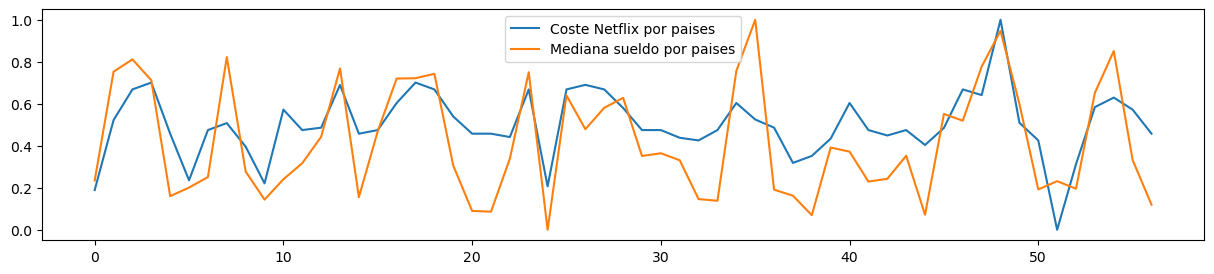

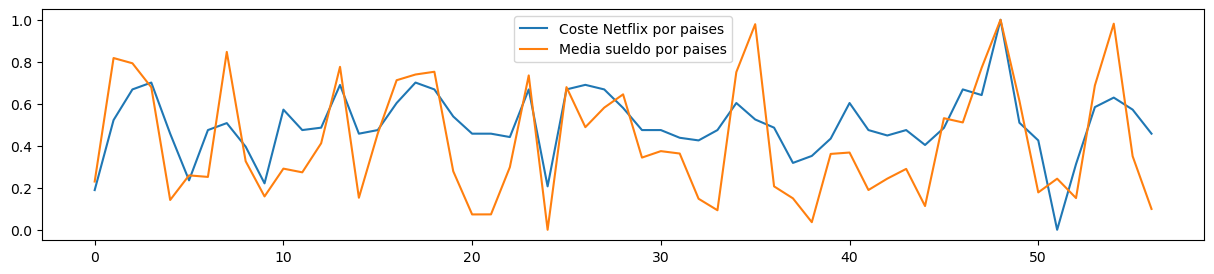

In [16]:
import matplotlib.pyplot as plt
cuotas_netflix = df_conjunto['Cost Per Month - Standard ($)']
medianas_salarios = df_conjunto['medianIncome']
salarios_medios  = df_conjunto['meanIncome']
plt.figure(figsize=(15,3))
plt.plot(cuotas_netflix)
plt.plot(medianas_salarios)
plt.legend(['Coste Netflix por paises','Mediana sueldo por paises'])
plt.show()
plt.figure(figsize=(15,3))
plt.plot(cuotas_netflix)
plt.plot(salarios_medios)
plt.legend(['Coste Netflix por paises','Media sueldo por paises'])
plt.show()

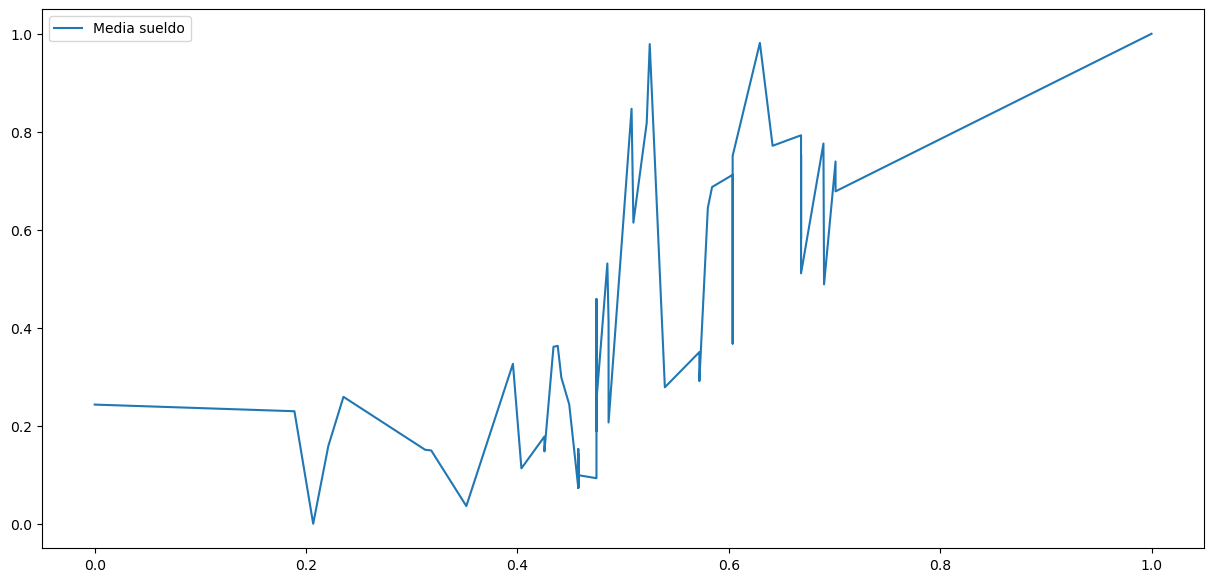

In [25]:
cuotas_netflix = df_conjunto.sort_values(by='Cost Per Month - Standard ($)')['Cost Per Month - Standard ($)']
#medianas_salarios = df_conjunto.sort_values(by='Cost Per Month - Standard ($)')['medianIncome']
medias_salarios = df_conjunto.sort_values(by='Cost Per Month - Standard ($)')['meanIncome']
plt.figure(figsize=(15,7))
#plt.plot(cuotas_netflix,medianas_salarios)
plt.plot(cuotas_netflix,medias_salarios)
plt.legend(['Media sueldo'])
plt.show()

In [12]:
df_conjunto.corr(numeric_only=True)

,Cost Per Month - Standard ($),medianIncome,meanIncome
Cost Per Month - Standard ($),1.000000,0.709101,0.699924
medianIncome,0.709101,1.000000,0.993289
meanIncome,0.699924,0.993289,1.000000


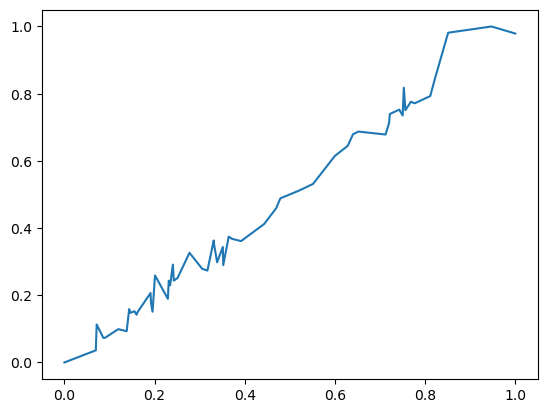

In [19]:
plt.plot(df_conjunto.sort_values(by='medianIncome')['medianIncome'],df_conjunto.sort_values(by='medianIncome')['meanIncome'])
#plt.plot(df_conjunto['meanIncome'])
plt.show()